## Проект: Вариант 2

### Задание 1. A/B–тестирование

**1.1 Условие**

Одной из основных задач аналитика в нашей команде является корректное проведение экспериментов. Для этого мы применяем метод A/B–тестирования. В ходе тестирования одной гипотезы целевой группе была предложена новая механика оплаты услуг на сайте, у контрольной группы оставалась базовая механика. В качестве задания Вам необходимо проанализировать итоги эксперимента и сделать вывод, стоит ли запускать новую механику оплаты на всех пользователей.

**1.2 Входные данные**

В качестве входных данных Вы имеете 4 csv-файла:

-   [**groups.csv**](https://disk.yandex.ru/d/UhyYx41rTt3clQ) - файл с информацией о принадлежности пользователя к контрольной или экспериментальной группе (А – контроль, B – целевая группа) 
-   [**groups_add.csv**](https://disk.yandex.ru/d/5Kxrz02m3IBUwQ) - дополнительный файл с пользователями, который вам прислали спустя 2 дня после передачи данных
-   [**active_studs.csv**](https://disk.yandex.ru/d/Tbs44Bm6H_FwFQ) - файл с информацией о пользователях, которые зашли на платформу в дни проведения эксперимента. 
-   [**checks.csv**](https://disk.yandex.ru/d/pH1q-VqcxXjsVA) - файл с информацией об оплатах пользователей в дни проведения эксперимента. 

**1.3 Вопросы**

Предлагаем Вам ответить на следующие вопросы:

-   На какие метрики Вы смотрите в ходе анализа и почему?
-   Имеются ли различия в показателях и с чем они могут быть связаны?
-   Являются ли эти различия статистически значимыми?
-   Стоит ли запускать новую механику на всех пользователей?

Данный список вопросов не является обязательным, и Вы можете при своём ответе опираться на собственный план.

**1.4 Требования к ответу**

-   При выполнении тестового задания необходимо использовать язык программирования Python. 
-   В файле обязательно должны быть комментарии к тем действиям, которые Вы выполняете с данными. 
-   Файл должен представлять собой законченный отчёт с выводами, сделанными в ходе исследования.

### Задание 2. SQL

**2.1 Очень усердные ученики.**
**2.1.1 Условие**

Образовательные курсы состоят из различных уроков, каждый из которых состоит из нескольких маленьких заданий. Каждое такое маленькое задание называется "горошиной".

Назовём очень усердным учеником того пользователя, который хотя бы раз за текущий месяц **правильно** решил 20 горошин.

**2.1.2 Задача**
Дана таблица **peas**:


| **Название атрибута**  | **Тип атрибута**  | **Смысловое значение**                    |
|:-----------------------|:------------------|:------------------------------------------|
| st_id                  | int               | ID ученика                                |
| timest                 | timestamp         | Время решения карточки                    |
| correct                | bool              | Правильно ли решена горошина?             |
| subject                | text              | Дисциплина, в которой находится горошина  |


Необходимо написать **оптимальный запрос**, который даст информацию о количестве очень усердных студентов за март 2020 года.  
_  
NB! Под усердным студентом мы понимаем студента, который правильно решил 20 задач за текущий месяц._ 

**2.2 Оптимизация воронки**
**2.2.1 Условие**

Образовательная платформа предлагает пройти студентам курсы по модели trial: студент может решить бесплатно лишь 30 горошин в день. Для неограниченного количества заданий в определенной дисциплине студенту необходимо приобрести полный доступ. Команда провела эксперимент, где был протестирован новый экран оплаты.

**2.2.2 Задача**
Дана таблицы: **peas**, **studs**:


| **Название атрибута**  | **Тип атрибута**   | **Смысловое значение**               |
|:-----------------------|:-------------------|:-------------------------------------|
| st_id                  | int                | ID ученика                           |
| test_grp               | text               | Метка ученика в данном эксперименте  |


и **final_project_checks**:


| **Название атрибута** | **Тип атрибута** | **Смысловое значение** |
|:----------------------|:-----------------|:-----------------------|
| st_id | int | ID ученика |
| sale_time | timestamp | Время покупки |
| money | int | Цена, по которой приобрели данный курс |
| subject | text | Дисциплина, на которую приобрели полный доступ 


Необходимо выгрузить следующую информацию о группах пользователей:

-   ARPU 
-   ARPAU 
-   CR в покупку 
-   СR активного пользователя в покупку 
-   CR пользователя из активности по математике (subject = ’math’) в покупку курса по математике

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as ss
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from tqdm import tqdm
from scipy.stats import norm
import pandahouse as ph

import os
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(6,3)}, style="whitegrid")

import warnings
warnings.filterwarnings('ignore')


In [3]:
pwd = os.getcwd()

In [4]:
# подгрузим файлы в переменные
groups = pd.read_csv(pwd + '\P_2_groups.csv', sep=';')
groups_add = pd.read_csv(pwd + '\P_2_group_add.csv')
active_studs = pd.read_csv(pwd + '\P_2_active_studs.csv')
checks = pd.read_csv(pwd + '\P_2_checks.csv', sep=';')

<hr>

#### **Задание 1. A/B–тестирование**
##### **1.1 Условие**
Одной из основных задач аналитика в нашей команде является корректное проведение экспериментов. Для этого мы применяем метод A/B–тестирования.</br> 
В ходе тестирования одной гипотезы целевой группе была предложена новая механика оплаты услуг на сайте, у контрольной группы оставалась базовая механика.</br>
В качестве задания Вам необходимо проанализировать итоги эксперимента и сделать вывод, стоит ли запускать новую механику оплаты на всех пользователей.
##### **1.2 Датасеты:**

**groups.csv** - файл с информацией о принадлежности пользователя к контрольной или экспериментальной группе **<span style="color:FireBrick">(А – контроль, B – целевая группа)</span>**.</br>
**groups_add.csv** - дополнительный файл с пользователями, который вам прислали спустя 2 дня после передачи данных.</br>
**active_studs.csv** - файл с информацией о пользователях, которые зашли на платформу в дни проведения эксперимента.</br>
**checks.csv** - файл с информацией об оплатах пользователей в дни проведения эксперимента.</br>

##### **1.3 Вопросы**
Предлагаем Вам ответить на следующие вопросы:</br>
1. На какие метрики Вы смотрите в ходе анализа и почему?</br>
2. Имеются ли различия в показателях и с чем они могут быть связаны?</br>
3. Являются ли эти различия статистически значимыми?</br>
4. Стоит ли запускать новую механику на всех пользователей?Данный список вопросов не является обязательным, и Вы можете при своём ответе опираться на собственный план.</br>

<hr>

##### <div align="center">**ВЗГЛЯНЕМ НА ДАННЫЕ**

#### **<span style="color:FireBrick">groups.csv</span>**

In [10]:
groups.head(2)

,id,grp
0,1489,B
1,1627,A


In [11]:
groups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74484 entries, 0 to 74483
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      74484 non-null  int64 
 1   grp     74484 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


#### **<span style="color:FireBrick">checks.csv</span>**

In [12]:
checks.head(2)

,student_id,rev
0,1627,990.0
1,3185,690.0


In [13]:
checks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  541 non-null    int64  
 1   rev         541 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.6 KB


#### **<span style="color:FireBrick">active_studs.csv</span>**

In [14]:
active_studs.head(2)

,student_id
0,581585
1,5723133


In [15]:
active_studs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8341 entries, 0 to 8340
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   student_id  8341 non-null   int64
dtypes: int64(1)
memory usage: 65.3 KB


#### **<span style="color:FireBrick">groups_add.csv</span>**

In [16]:
groups_add.head(2)

,id,grp
0,5694584,B
1,5694830,B


In [17]:
groups_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      92 non-null     int64 
 1   grp     92 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


<hr>

##### <div align="center">**ИЗУЧИМ ДАННЫЕ**

#### **<span style="color:FireBrick">groups.csv</span>**

В датасете все пользователи уникальны. В группе A (контроль) пользователей 20%, а в группе B (целевая) пользователей 80%. 

In [18]:
groups.head(3)

,id,grp
0,1489,B
1,1627,A
2,1768,B


In [19]:
# Колличество уникальных пользователей и количество строк равны
groups.shape

(74484, 2)

In [20]:
groups.id.nunique()

74484

In [21]:
# Соотношение пользователей в процентах
round(groups.grp.value_counts(normalize=True).mul(100), 2)

B    80.3
A    19.7
Name: grp, dtype: float64

<AxesSubplot: xlabel='grp', ylabel='Count'>

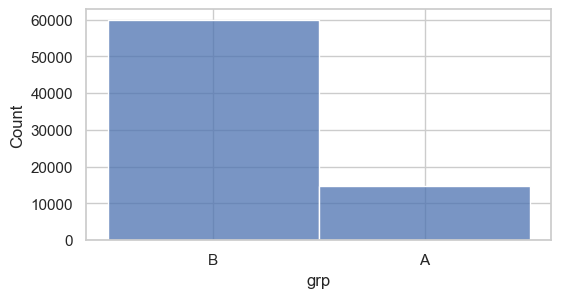

In [22]:
# Посмотрим гистограмму по группам
sns.histplot(groups, x='grp')

<hr>

#### **<span style="color:FireBrick">groups_add.csv</span>**

В этом датасете все пользователи уникальны. В группе A (контроль) пользователей 23%, а в группе B (целевая) пользователей 76%. 

In [23]:
groups_add.head(2)

,id,grp
0,5694584,B
1,5694830,B


In [24]:
groups_add.shape

(92, 2)

In [25]:
groups_add.id.nunique()

92

In [26]:
groups_add.grp.value_counts()

B    70
A    22
Name: grp, dtype: int64

In [27]:
# Соотношение пользователей в процентах
round(groups_add.grp.value_counts(normalize=True).mul(100), 2)

B    76.09
A    23.91
Name: grp, dtype: float64

<AxesSubplot: xlabel='grp', ylabel='Count'>

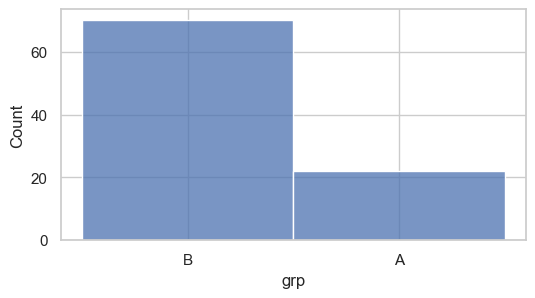

In [28]:
# Посмотрим гистограмму по группам
sns.histplot(groups_add, x='grp')

<hr>

#### **<span style="color:FireBrick">active_studs.csv</span>**

В этом датасете 8341 уникальный пользователь. Распределение не нормальное.

In [29]:
active_studs.head(2)

,student_id
0,581585
1,5723133


In [30]:
active_studs.shape

(8341, 1)

In [31]:
active_studs.student_id.nunique()

8341

<AxesSubplot: >

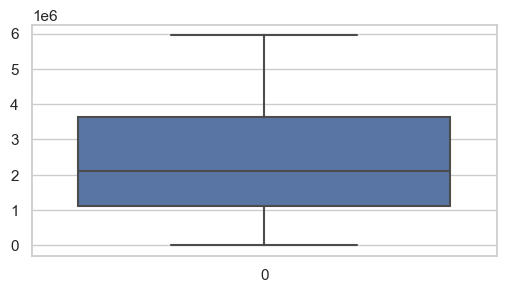

In [32]:
sns.boxplot(active_studs.student_id)

<AxesSubplot: ylabel='Count'>

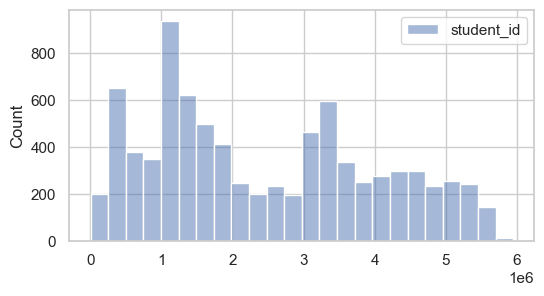

In [33]:
# Посмотрим гистограмму по суммам
sns.histplot(active_studs)

<hr>

#### **<span style="color:FireBrick">checks.csv</span>**

В этом датасете пользователи уникальны и их количество равно колличеству строк. Колонка rev имеет ненормальное распределение, и на боксплоте видны выбросы.

In [34]:
checks.head(2)

,student_id,rev
0,1627,990.0
1,3185,690.0


In [35]:
checks.shape

(541, 2)

In [36]:
checks.student_id.nunique()

541

<AxesSubplot: >

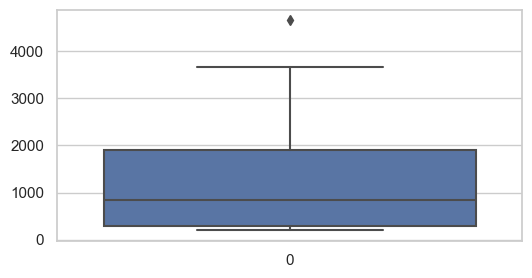

In [37]:
sns.boxplot(checks.rev)

<AxesSubplot: xlabel='rev', ylabel='Count'>

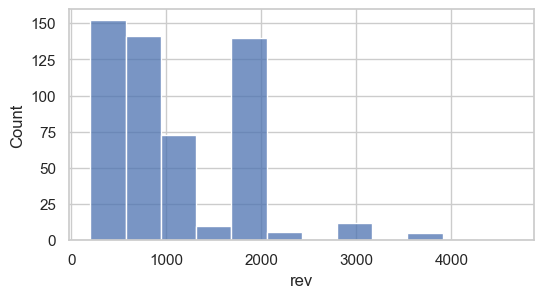

In [38]:
# Посмотрим гистограмму по суммам
sns.histplot(checks, x='rev')

<hr>

##### <div align="center">**ВЫПОЛНЯЕМ ЗАДАНИЕ**

**Пока что дополнительных пользователей, которыех прислали спустя 2 дня не учитываю, с их учатием проведем отдельный тест.**

**Исследуем изменение:**</br>
**<span style="color:FireBrick">Группа A (контроль) - базовая механника оплаты услуг.</span>**</br>
**<span style="color:FireBrick">Группа B (целевая) - новая механика оплаты услуг.</span>**</br>

**Метрики для эксперимента:**</br>
**ARPPU** - кумулятивный доход на одного платящего пользователя за всё время. Расчет по формуле **ARPPU = Revenue / Paying Users**</br>
**ARPU** - показывает средний доход с одного пользователя. Расчет по формуле **ARPU = Revenue / Users**</br>

**CR - Conversion rate** —  так же нам понадобится отношение числа пользователей, которые выполнили какое-либо целевое действие к общему числу пользователей.</br>
Что бы для метрики **ARPPU** определить пользователей сделавших покупку.</br>

***H0 - ARPPU остался неизменным. H1 - ARPPU стат.значимо изменился.***</br>
***H0 - ARPU остался неизменным. H1 - ARPU стат.значимо изменился.***</br>

**Определяем порог значимости как Alpha - 0.05**</br>

**groups.csv** - файл с информацией о принадлежности пользователя к контрольной или экспериментальной группе **<span style="color:FireBrick">(А – контроль, B – целевая группа)</span>**.</br>
**groups_add.csv** - дополнительный файл с пользователями, который вам прислали спустя 2 дня после передачи данных.</br>
**active_studs.csv** - файл с информацией о пользователях, которые зашли на платформу в дни проведения эксперимента.</br>
**checks.csv** - файл с информацией об оплатах пользователей в дни проведения эксперимента.</br>


In [39]:
# Выбираем активных пользователей
activ_users = groups.query('id in @active_studs.student_id')

In [40]:
activ_users.head()

,id,grp
1,1627,A
10,2085,B
12,2215,B
43,3391,A
45,3401,B


In [41]:
activ_users.shape

(8328, 2)

##### Создадим колонку с оплатой соеденив датафреймы

In [42]:
# Переименуем колонку по которой будем делать мердж
checks = checks.rename(columns={'student_id' : 'id'})

In [43]:
# Делаем мердж и пропущенные значения заменяем на нули
all_users = activ_users.merge(checks, how='left', on='id')
all_users.rev = all_users.rev.fillna(0)

In [44]:
# Создадим колонку с сконвертированными пользователями
all_users['cr'] = np.where(all_users.rev > 0, 1, 0)

In [45]:
# Добавим колонку с метрикой ARPPU
all_users['arppu'] = round(all_users.rev / all_users.query('rev != 0').shape[0], 3)

In [46]:
# Добавим колонку с метрикой ARPU
all_users['arpu'] = round(all_users.rev / all_users.shape[0], 3)

In [47]:
# Теперь с этим удобно работать
all_users.head()

,id,grp,rev,cr,arppu,arpu
0,1627,A,990.0,1,2.532,0.119
1,2085,B,0.0,0,0.000,0.000
2,2215,B,0.0,0,0.000,0.000
3,3391,A,0.0,0,0.000,0.000
4,3401,B,0.0,0,0.000,0.000


##### Посмотрим что у нас получилось

In [48]:
# Колличество пользователей в контрольной и тестовой группе
all_users.grp.value_counts()

B    6793
A    1535
Name: grp, dtype: int64

In [49]:
round(all_users.grp.value_counts(normalize=True).mul(100), 2)

B    81.57
A    18.43
Name: grp, dtype: float64

##### Посмотрим распределение на графике

<AxesSubplot: xlabel='arppu', ylabel='Density'>

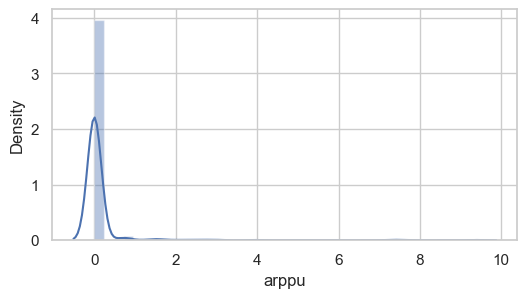

In [50]:
# Группа A. Ненормальное распределение смещенное в лево.
al_arppu_a = all_users.query('grp == "A"')
sns.distplot(al_arppu_a.arppu)

<AxesSubplot: xlabel='arppu', ylabel='Density'>

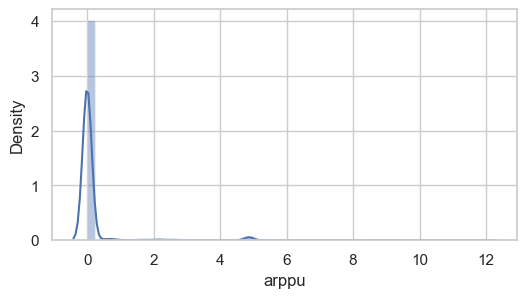

In [51]:
# Группа B. Ненормальное распределение смещенное в лево.
al_arppu_b = all_users.query('grp == "B"')
sns.distplot(al_arppu_b.arppu)

<AxesSubplot: xlabel='id', ylabel='Density'>

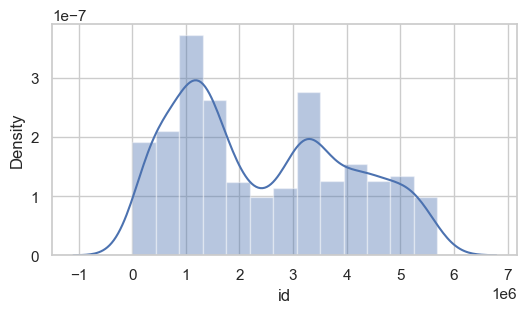

In [52]:
# Группа A. Если опираемся на id пользователей. Ненормальное бимодальное распределение.
al_a = all_users.query('grp == "A"')
sns.distplot(al_a.id)

<AxesSubplot: xlabel='id', ylabel='Density'>

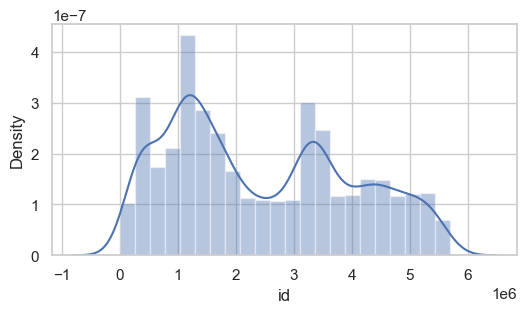

In [53]:
# Группа B. Если опираемся на id пользователей. Ненормальное бимодальное распределение.
al_b = all_users.query('grp == "B"')
sns.distplot(al_b.id)

<hr>

##### <div align="center">**ПРОВЕДЕНИЕ ТЕСТА**

**Для таких случаев хорошо подходит метод тестирования Bootstrap.**</br>

1. Строите бутстрап-распределения параметра в A и B.</br>
2. Вычисляете их разницу (вычитание матриц).</br>
3. В получившемся распределении разницы считаете доверительный интервал.</br>
4. Смотрите, попадает ли доверительный интервал в 0. И если да, то нулевая гипотеза на заданном уровне значимости принимается.</br>

#### Функция Bootstrap

In [60]:
# Объявим функцию, которая позволит проверять гипотезы с помощью бутстрапа
def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    plt.hist(pd_boot_data[0], bins = 50)
    
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {#"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value}

100%|██████████| 3000/3000 [00:00<00:00, 3187.91it/s]


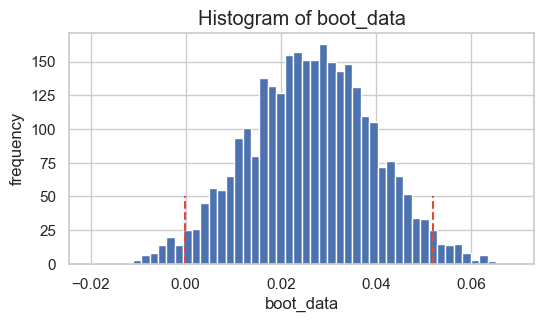

{'ci':               0
 0.025 -0.000125
 0.975  0.052090,
 'p_value': 0.048233431649325295}

In [61]:
get_bootstrap(al_b.arppu, al_a.arppu, boot_it = 3000)

100%|██████████| 3000/3000 [00:00<00:00, 3188.09it/s]


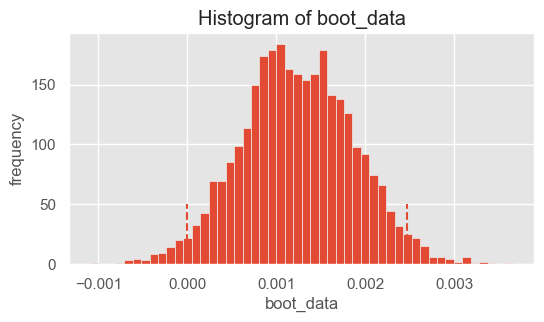

{'ci':               0
 0.025 -0.000005
 0.975  0.002469,
 'p_value': 0.05095447796567459}

In [62]:
get_bootstrap(al_b.arpu, al_a.arpu, boot_it = 3000)

<hr>

##### <div align="center">**ВЫВОД**

**По метрике стат.значимо изменился ARPPU P_value - 0.04**</br>
**По метрике стат.значимо изменился ARPU P_value - 0.03**</br>

***Отверагаем нулевую гипотезу, и выкатываем новую механнику оплаты услуг.***

<hr>

##### <div align="center">**Задание 2. SQL**

In [63]:
# Подключение к ClickHouse
# Создаем переменную с данными для подлкючения к ClickHouse
connection = {  'host': 'http://clickhouse.beslan.pro:8080',        
                'database':'default',
                'user':'student', 
                'password':'dpo_python_2020'
             } 

#### **Задание 2.1. Очень усердные ученики.**
##### **2.1.1 Условие**
Образовательные курсы состоят из различных уроков, каждый из которых состоит из нескольких маленьких заданий. Каждое такое маленькое задание называется "горошиной".</br>
Назовём очень усердным учеником того пользователя, который хотя бы раз за текущий месяц правильно решил 20 горошин.</br>

**2.1.2 Задача**
Необходимо написать оптимальный запрос, который даст информацию о количестве очень усердных студентов за март 2020 года.Структура данных:</br>

Таблица: peas
| Название атрибута | Тип атрибута  | Смысловое значение                       |
| ----------------- |:--------------| :----------------------------------------|
| st_id             | int           | ID ученика                               |
| timest            | timestamp     | Время решения карточки                   |
| correct           | bool          | Правильно ли решена горошина?            |
| subject           | text          | Дисциплина, в которой находится горошина |




In [64]:
r1 = '''
SELECT
    COUNT(st_id) as nt
FROM 
    (
    SELECT
        st_id,
        SUM(correct) AS rigth_decision
    FROM peas
    WHERE FROM_UNIXTIME(timest, '%Y-%m') = '2020-03'
    GROUP BY st_id
    HAVING rigth_decision >= 20
    )
'''

In [65]:
# Ложим запрос в переменную
m_s = ph.read_clickhouse(query=r1, connection=connection)

In [66]:
# Результат
m_s

,nt
0,0


#### **2.2 Оптимизация воронки**

Для этого задания мне не хватило времени и навыка. Пока плохо подружился с SQL. Продолжу совершенствовать его после курса. 

<hr>

##### <div align="center">**Задание 3. Python**
**Здача 3.1.**</br>
Реализуйте функцию, которая будет автоматически подгружать информацию из дополнительного файла groups_add.csv,</br>
(заголовки могут отличаться) и на основании дополнительных параметров пересчитывать метрики.

In [67]:
def add_file_arpu(x):
  a = x
  all_a = pd.concat([al_a, a.query('grp == "A"')]).fillna(0)
  all_b = pd.concat([al_b, a.query('grp == "B"')]).fillna(0)
  b_data = get_bootstrap(all_b.arpu, all_a.arpu, boot_it = 3000)
  return(b_data["p_value"])

100%|██████████| 3000/3000 [00:00<00:00, 3217.98it/s]


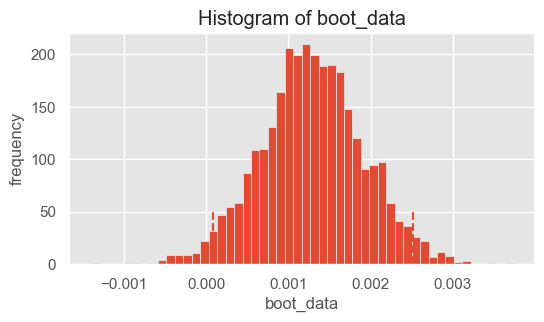

0.03879020719574657

In [68]:
add_file_arpu(groups_add)

In [69]:
def add_file_arppu(x):
  a = x
  all_a = pd.concat([al_a, a.query('grp == "A"')]).fillna(0)
  all_b = pd.concat([al_b, a.query('grp == "B"')]).fillna(0)
  b_data = get_bootstrap(all_b.arppu, all_a.arppu, boot_it = 3000)
  return(b_data["p_value"])

100%|██████████| 3000/3000 [00:00<00:00, 3141.35it/s]


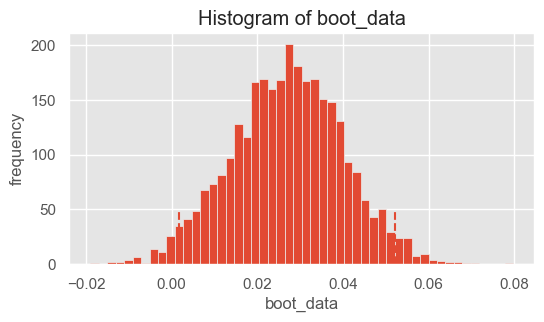

0.03783034756752324

In [70]:
add_file_arppu(groups_add)

##### <div align="center">**ВЫВОД**

**По метрике стат.значимо изменился ARPPU P_value - 0.04**</br>
**По метрике стат.значимо изменился ARPU P_value - 0.03**</br>

***С доп данными значение стат.значимости так же меньше alpha. А значит отверагаем нулевую гипотезу, и выкатываем новую механнику оплаты услуг.***

<hr>